# Evolutionary Computation for Evolving Neural Network EMG Classifier Structure and Weights
In this project, the goal is to improve the structure and weights of a neural network that classifies EMG signals, and compare the genetic solutions to standard classifiers.

Control:
- Neural Network (Backpropagation)

Evolutionary Models:
- NEAT (NeuroEvolution of Augmenting Topologies)
- HyperNEAT

In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# Imports
from __future__ import annotations
from pathlib import Path
from typing import List, Tuple, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Custom library
from emg_evo_lib_kb import *

In [ ]:
root_path = Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master")
emg_column_names = ["Time"] + [f"ch{i}" for i in range(1, 9)] + ["Class"]

# Gesture classes(ignore 0 = unmarked)
# gesture_classes_plot = [0, 1, 2, 3, 4, 5, 6, 7]
gesture_classes = [1, 2, 3, 4, 5, 6]

In [4]:
X, y, meta = build_feature_dataset(root_path, emg_column_names, gesture_classes)
print("X shape:", X.shape)
if len(X) > 0:
    print("Example feature vector length:", len(X[0]))
    print("Example feature vector:", X[0])
    print("Example label:", y[0])
    print("Example meta:", meta[0])

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

In [5]:
len(X)

864

In [6]:
y

array([1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2,
       3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6,
       1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4,
       5, 6, 1, 2, 3, 5, 4, 6, 1, 2, 3, 4, 5, 6, 1,

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

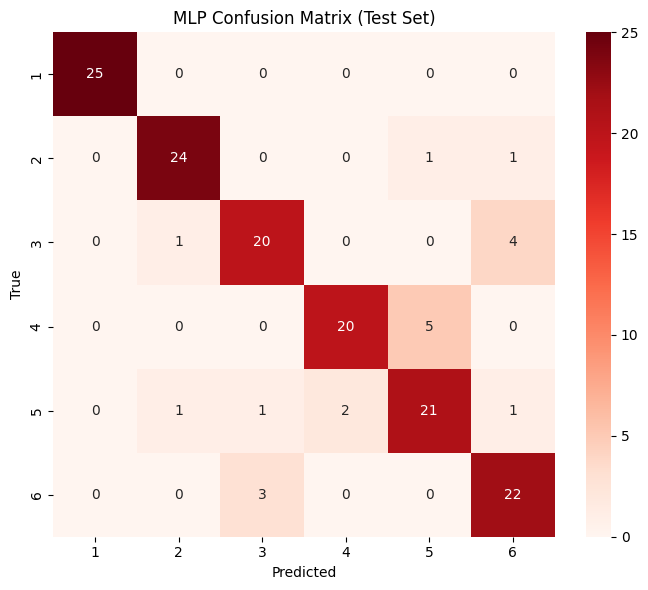

In [25]:
run_control_nn(root_path, emg_column_names, gesture_classes)

## NEAT

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

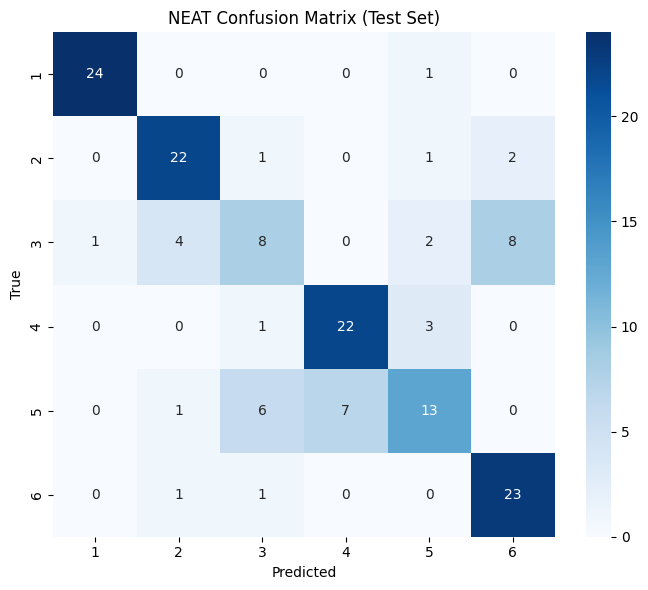

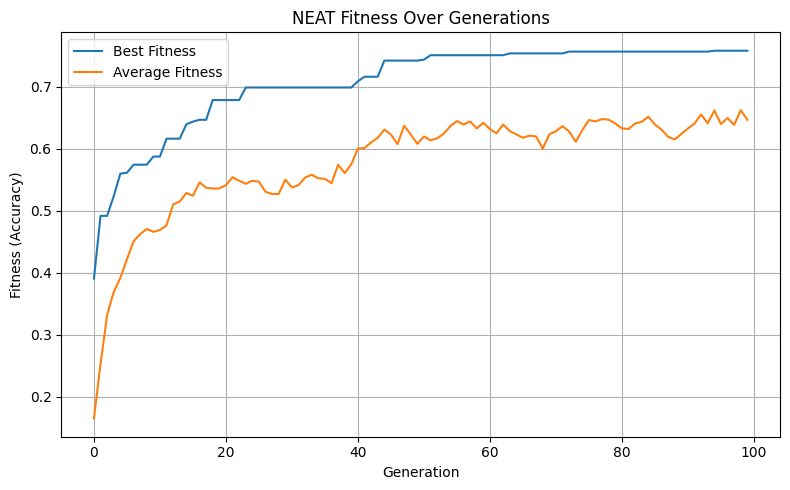

In [19]:
run_neat_emg(root=root_path, emg_column_names=emg_column_names, valid_classes=gesture_classes,
neat_config_path=Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/Evolutionary-EMG-Classification/configs/neat_emg_config.ini"),
n_generations=100)

In [ ]:
import graphviz
from neat.graphs import feed_forward_layers

def draw_net(config, genome, view=True, filename="neat_winner", node_names=None):
    """
    Visualize a NEAT network using graphviz.
    """
    if node_names is None:
        node_names = {}

    # Create a digraph
    dot = graphviz.Digraph(format="png")
    dot.attr(rankdir="LR")

    # Colors
    input_color = "#97C2FC"
    output_color = "#FFB07C"
    hidden_color = "#C4F0C2"

    # Input nodes
    for k in range(config.genome_config.num_inputs):
        name = node_names.get(-k-1, f"input_{k}")
        dot.node(str(-k-1), name, shape="box", style="filled", fillcolor=input_color)

    # Output nodes
    for k in range(config.genome_config.num_outputs):
        nid = k
        name = node_names.get(nid, f"output_{k}")
        dot.node(str(nid), name, shape="box", style="filled", fillcolor=output_color)

    # Hidden nodes
    hidden_nodes = [n for n in genome.nodes.keys() 
                    if n >= config.genome_config.num_outputs]
    for n in hidden_nodes:
        dot.node(str(n), f"h{n}", style="filled", fillcolor=hidden_color)

    # Connections
    for cg in genome.connections.values():
        if cg.enabled:
            style = "solid"
            color = "black"
        else:
            style = "dotted"
            color = "gray"

        src, dst = cg.key
        dot.edge(str(src), str(dst),
                 label=f"{cg.weight:.2f}",
                 color=color, style=style)

    dot.render(filename, view=view)
    return dot

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

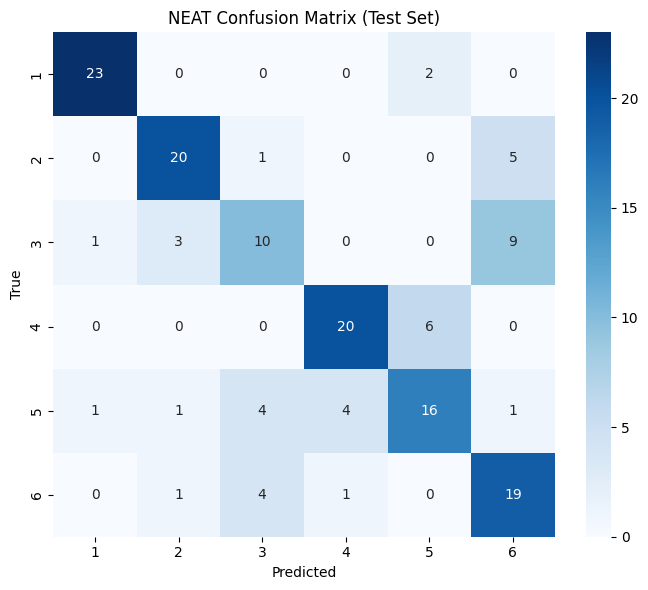

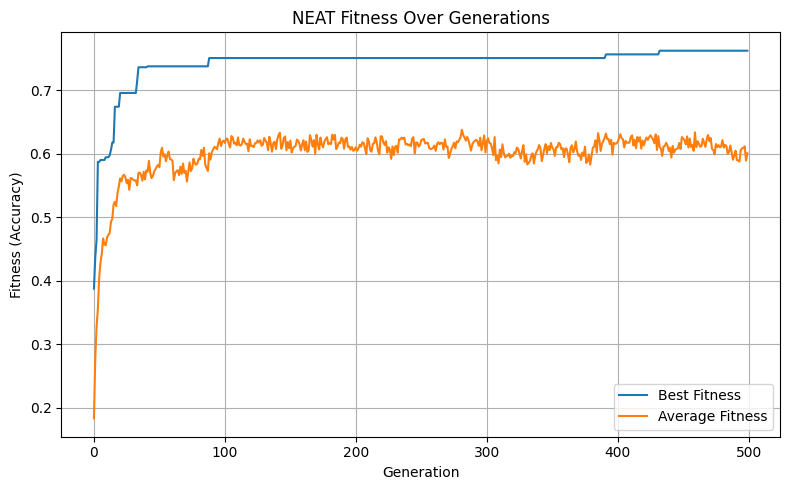

In [20]:
run_neat_emg(root=root_path, emg_column_names=emg_column_names, valid_classes=gesture_classes,
neat_config_path=Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/Evolutionary-EMG-Classification/configs/neat_emg_config.ini"),
n_generations=500)

## Edit configurations (trial 2)

Found 73 EMG files under /Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master
[1/73] 1_raw_data_13-12_22.03.16.txt: 12 gesture segments
[2/73] 2_raw_data_13-13_22.03.16.txt: 12 gesture segments
[3/73] 1_raw_data_14-19_22.03.16.txt: 12 gesture segments
[4/73] 2_raw_data_14-21_22.03.16.txt: 12 gesture segments
[5/73] 1_raw_data_09-32_11.04.16.txt: 12 gesture segments
[6/73] 2_raw_data_09-34_11.04.16.txt: 12 gesture segments
[7/73] 1_raw_data_18-02_24.04.16.txt: 12 gesture segments
[8/73] 2_raw_data_18-03_24.04.16.txt: 12 gesture segments
[9/73] 1_raw_data_10-28_30.03.16.txt: 12 gesture segments
[10/73] 2_raw_data_10-29_30.03.16.txt: 12 gesture segments
[11/73] 1_raw_data_10-38_11.04.16.txt: 12 gesture segments
[12/73] 2_raw_data_10-40_11.04.16.txt: 12 gesture segments
[13/73] 1_raw_data_18-48_22.03.16.txt: 12 gesture segments
[14/73] 2_raw_data_18-50_22.03.16.txt: 12 gesture segments
[15/73] 1_raw_data_12-14_23

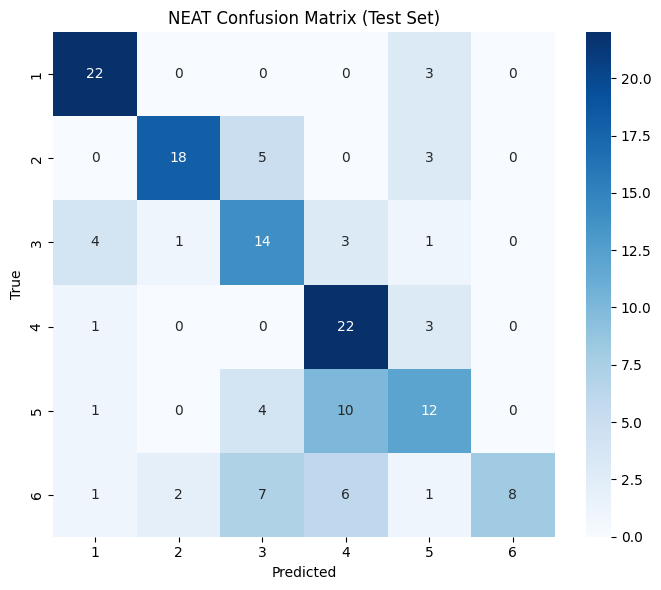

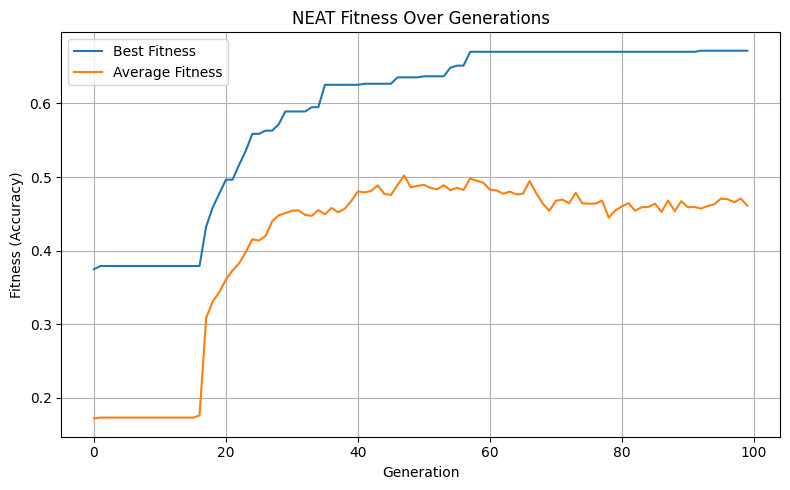

In [ ]:
run_neat_emg(root=root_path, emg_column_names=emg_column_names, valid_classes=gesture_classes,
neat_config_path=Path("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/Evolutionary-EMG-Classification/configs/neat_emg_config_2.ini"),
n_generations=100)

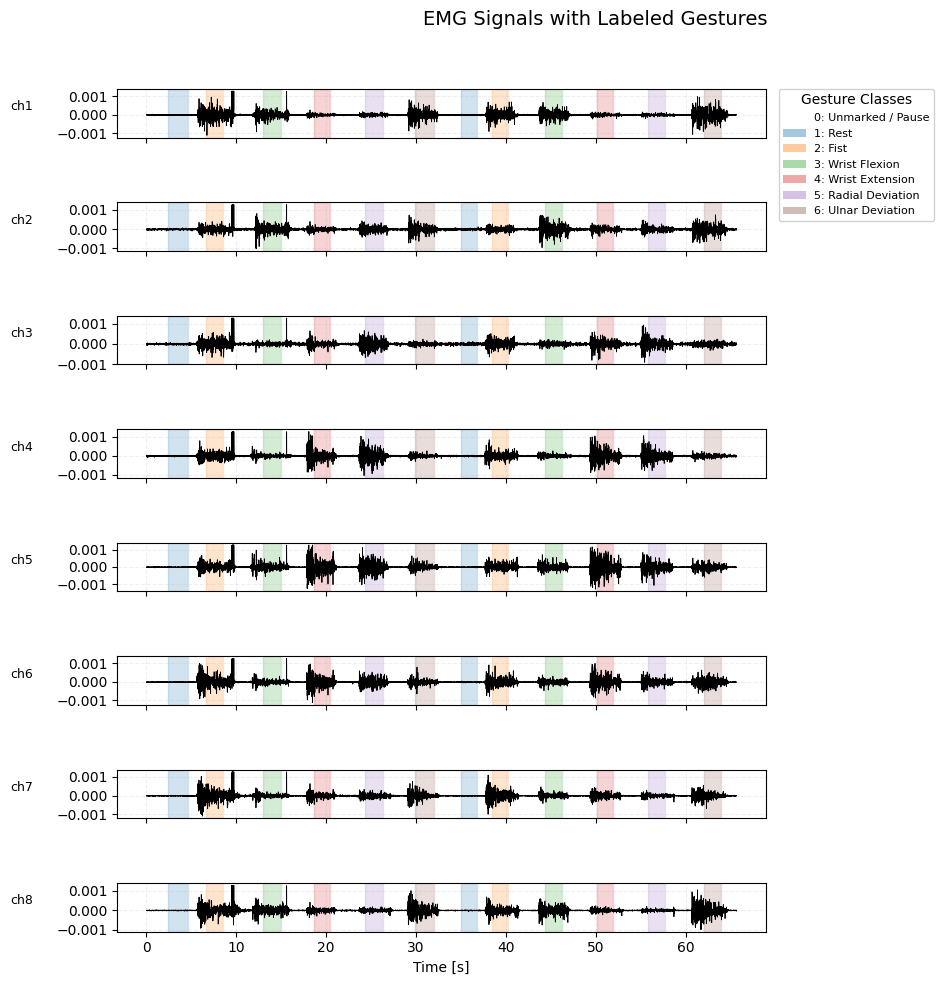

In [ ]:
# Optional: Map class IDs to human-readable labels for the legend
CLASS_LABELS = {
    0: "Unmarked / Pause",
    1: "Rest",
    2: "Fist",
    3: "Wrist Flexion",
    4: "Wrist Extension",
    5: "Radial Deviation",
    6: "Ulnar Deviation",
    7: "Extended Palm"
}

# Colors for shading different classes (feel free to adjust)
CLASS_COLORS = {
    0: "#FFFFFF",  # white
    1: "#1f77b4",  # blue
    2: "#ff7f0e",  # orange
    3: "#2ca02c",  # green
    4: "#d62728",  # red
    5: "#9467bd",  # purple
    6: "#8c564b",  # brown
    7: "#FFF8DC",  # yellow
}


def _get_class_segments(df: pd.DataFrame, valid_classes=None):
    """
    From a DataFrame with a 'Class' column, return a list of segments:
    (start_time_sec, end_time_sec, class_label).

    valid_classes: list of class labels to include in shading (e.g., [1..6]).
                   If None, all non-zero classes are included.
    """
    if valid_classes is None:
        valid_classes = [c for c in sorted(df["Class"].unique()) if c != 0]

    segments = []
    current_label = df["Class"].iloc[0]
    start_idx = 0

    class_arr = df["Class"].to_numpy()
    time_ms = df["Time"].to_numpy()

    for i, label in enumerate(class_arr[1:], start=1):
        if label != current_label:
            # Close previous segment if it was a gesture
            if current_label in valid_classes:
                start_t = time_ms[start_idx] / 1000.0
                end_t = time_ms[i - 1] / 1000.0
                segments.append((start_t, end_t, int(current_label)))
            # Start new segment if needed
            start_idx = i
            current_label = label

    # Handle last segment
    if current_label in valid_classes:
        start_t = time_ms[start_idx] / 1000.0
        end_t = time_ms[-1] / 1000.0
        segments.append((start_t, end_t, int(current_label)))

    return segments


def plot_emg_segments_for_file(
    file_path: Path,
    valid_classes=None,
    figsize=(12, 10),
    title_prefix: str = "EMG Signals with Labeled Gestures",
):
    """
    Plot the 8 EMG channels for a single file and shade gesture segments
    according to the 'Class' column.

    Args:
        file_path: Path to a single EMG .txt file (from the dataset).
        valid_classes: List of gesture classes to highlight (default: VALID_GESTURE_CLASSES).
        figsize: Matplotlib figure size.
        title_prefix: Title prefix for the plot.
    """
    file_path = Path(file_path)
    df = load_emg_file(file_path,emg_column_names)

    if valid_classes is None:
        valid_classes = gesture_classes_plot  # from preprocessing.py

    # Time in seconds for plotting
    t_sec = df["Time"].to_numpy() / 1000.0

    ch_cols = [f"ch{i}" for i in range(1, 9)]

    # Get segments per class
    segments = _get_class_segments(df, valid_classes=valid_classes)

    fig, axes = plt.subplots(len(ch_cols), 1, figsize=figsize, sharex=True)
    if len(ch_cols) == 1:
        axes = [axes]

    for idx, ch in enumerate(ch_cols):
        ax = axes[idx]
        ax.plot(t_sec, df[ch].to_numpy(), lw=0.6, color="black")
        ax.set_ylabel(ch, rotation=0, labelpad=25, fontsize=9)
        ax.grid(alpha=0.2, linestyle="--")

        # Shade gesture segments
        for (start_t, end_t, label) in segments:
            color = CLASS_COLORS.get(label, "#aaaaaa")
            ax.axvspan(start_t, end_t, color=color, alpha=0.2)

        # Remove x tick labels for all but bottom plot
        if idx < len(ch_cols) - 1:
            ax.tick_params(labelbottom=False)

    axes[-1].set_xlabel("Time [s]")
    fig.suptitle(f"{title_prefix}", fontsize=14)

    # Build legend from classes actually present in segments
    used_labels = sorted(set(label for (_, _, label) in segments))
    legend_patches = []
    from matplotlib.patches import Patch

    for label in used_labels:
        legend_patches.append(
            Patch(
                facecolor=CLASS_COLORS.get(label, "#aaaaaa"),
                alpha=0.4,
                label=f"{label}: {CLASS_LABELS.get(label, f'Class {label}')}",
            )
        )

    if legend_patches:
        axes[0].legend(
            handles=legend_patches,
            loc="upper left",
            bbox_to_anchor=(1.02, 1.0),  # push legend just outside the axes
            borderaxespad=0.0,
            fontsize=8,
            title="Gesture Classes",
            framealpha=0.9,
        )

    # Leave room on the right for the external legend
    plt.tight_layout(rect=[0, 0, 0.8, 0.95])

    return fig, axes

fig, axes = plot_emg_segments_for_file("/Users/kaanborekci/Desktop/CS496/Code/Self-Project-Evolutionary-Computation/EMG-Project/UC-Irvine-Set/EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt")
plt.show()